## Hampy Tutorial

This tutorial goes through most of hampy features with examples of how to use it.

In [ ]:
from pprint import pprint
try:
    from quantum_launcher.hampy import Variable, Equation
    from quantum_launcher import hampy
except:
    import sys, os
    parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    sys.path.insert(0, parent_dir)

    from quantum_launcher.hampy import Variable, Equation
    from quantum_launcher import hampy

Main components:

- Equation: Wrapper to SparsePauliOp that adds few functionalities for boolean operations
    - Operations:
        - And
        - Or
        - Xor
        - Negation
    - Other functions:
        - hamiltonian - stores the SparsePauliOp instance
        - get_variable(index) - returns the variable under given index
        - is_quadratic() - verifies if hamiltonian is of up to quadratic order
        - get_order() - returns the order of hamiltonian
- Variable: Pointer for specific variable

`Note:` Variable(0, eq) == eq.get_variable(0) == eq[0]

In [3]:
eq = Equation(4)
var0 = eq.get_variable(0)
var2 = Variable(2, eq)
part_0 = var0 & ~var2
part_1 = eq[1] & eq[3]
eq = part_0 | part_1
print(f'Hamiltonian order: {eq.get_order()}')
print(f'And so Hamiltonian is not quadratic: {eq.is_quadratic()}')
pprint(list(eq.hamiltonian.paulis))

Hamiltonian order: 4
And so Hamiltonian is not quadratic: False
[Pauli('IIII'),
 Pauli('IZII'),
 Pauli('IIIZ'),
 Pauli('IZIZ'),
 Pauli('IIZI'),
 Pauli('ZIII'),
 Pauli('ZIZI'),
 Pauli('IZZI'),
 Pauli('ZZII'),
 Pauli('ZZZI'),
 Pauli('IIZZ'),
 Pauli('ZIIZ'),
 Pauli('ZIZZ'),
 Pauli('IZZZ'),
 Pauli('ZZIZ'),
 Pauli('ZZZZ')]


Hampy also support some of often used equations in the equations modules such as one_in_n returning True if there is exactly one variable that is true in given list.

In [4]:
one_in_n = hampy.equations.one_in_n([0, 1, 2, 3, 4, 5], size=6)
print(one_in_n.hamiltonian)

SparsePauliOp(['IIIIII', 'ZIIIII', 'IIIZII', 'ZIIZII', 'IIZIII', 'ZIZIII', 'IIZZII', 'IZIIII', 'ZZIIII', 'IZIZII', 'ZIZIZZ', 'IIZZZZ', 'ZIZZZZ', 'ZZIIZZ', 'IZIZZZ', 'ZZIZZZ', 'IZZIZZ', 'ZZZIZZ', 'IZZZZZ', 'ZZZZZZ', 'IIIIZI', 'ZIIIZI', 'IIIZZI', 'IIIIIZ', 'ZIIIIZ', 'IIIZIZ', 'ZZZIZI', 'IZZZZI', 'ZZZZZI', 'ZZZIIZ', 'IZZZIZ', 'ZZZZIZ', 'IZZIII', 'IIZIZI', 'IZIIZI', 'IIZIIZ', 'IZIIIZ', 'IIIIZZ', 'ZZZZII', 'ZIZZZI', 'ZZIZZI', 'ZIZZIZ', 'ZZIZIZ', 'ZIIZZZ'],
              coeffs=[ 0.09375+0.j,  0.0625 +0.j,  0.0625 +0.j,  0.03125+0.j,  0.0625 +0.j,
  0.03125+0.j,  0.03125+0.j,  0.0625 +0.j,  0.03125+0.j,  0.03125+0.j,
 -0.03125+0.j, -0.03125+0.j, -0.0625 +0.j, -0.03125+0.j, -0.03125+0.j,
 -0.0625 +0.j, -0.03125+0.j, -0.0625 +0.j, -0.0625 +0.j, -0.09375+0.j,
  0.0625 +0.j,  0.03125+0.j,  0.03125+0.j,  0.0625 +0.j,  0.03125+0.j,
  0.03125+0.j, -0.03125+0.j, -0.03125+0.j, -0.0625 +0.j, -0.03125+0.j,
 -0.03125+0.j, -0.0625 +0.j,  0.03125+0.j,  0.03125+0.j,  0.03125+0.j,
  0.03125+0.j,  0.03125+0.

Hampy also offers tools for debugging and verifying correctness of your hamiltonians.

Main component of debug module is TruthTable storing all information about values of hamiltonians truth table, because of that is strongly limited to around hamiltonians of size around 20, and we do not recommend trying to use it on larger hamiltonians, as complexity growths exponentially.

Hamiltonians energies are in binary values?: True
Value of '000100' is 1
Value of 0 is 0
Hamiltonian has 6 valid solutions:
['100000', '010000', '001000', '000100', '000010', '000001']


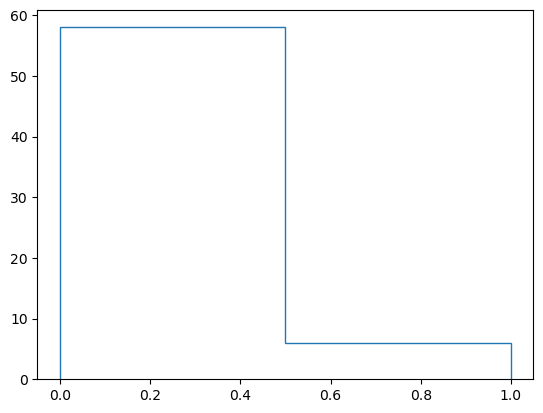

In [5]:
truth = hampy.debug.TruthTable(one_in_n)
print(f'Hamiltonians energies are in binary values?: {truth.check_if_binary()}')
print(f"Value of '000100' is {truth['000100']}")
print(f'Value of 0 is {truth[0]}')
print(f'Hamiltonian has {truth.count(True)} valid solutions:')
pprint(truth.get_solutions(True))
truth.plot_distribution()

### Utility functions

`shift_affected_qubits()`  
Changes the qubits affected by a given equation.

In [13]:
constraint = hampy.one_in_n([0,2],4)
constraint &= (~constraint[1] & ~constraint[3]) #Restrict other qubits to 0

truth = hampy.debug.TruthTable(constraint)
print(f'Constraint has {truth.count(True)} valid solutions:')
pprint(truth.get_solutions(True))

Constraint has 2 valid solutions:
['1000', '0010']


In [14]:
shifted = hampy.shift_affected_qubits(constraint, 1)

truth = hampy.debug.TruthTable(shifted)
print(f'Constraint has {truth.count(True)} valid solutions:')
pprint(truth.get_solutions(True))

Constraint has 2 valid solutions:
['0100', '0001']


The one_in_n constraint was shifted from qubits [0,2] to qubits [1,3]